# Домашнее задание к лекции "Базовые понятия статистики"

## Обязательная часть

Будем осуществлять работу с непростым [набором данных](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv) о состоянии здоровья лошадей, испытывающих кишечные колики. 

### Задание 1. Базовое изучение

Изучить представленный набор данных на основе [описания его столбцов](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.names) и выбрать 8 столбцов для дальнейшего изучения (среди них должны быть как числовые, так и категориальные). Провести расчет базовых метрик для них, кратко описать результаты.

### Задание 2. Работа с выбросами

В выбранных числовых столбцах найти выбросы, выдвинуть гипотезы об их причинах и проинтерпретировать результаты. Принять и обосновать решение о дальнейшей работе с ними.

### Задание 3. Работа с пропусками

Рассчитать количество выбросов для всех выбранных столбцов. Принять и обосновать решение о методе работы с пропусками по каждому столбцу, сформировать датафрейм, в котором пропуски будут отсутствовать.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random as rnd

In [2]:
#Задание №1

#names = ['surgery', 'age', 'hospital number', 'rectal temperature', 'pulse', 'respiratory rate', 
#         'temperature of extremities', 'peripheral pulse', 'mucous membranes', 'capillary refill time', 
#         'pain', 'peristalsis', 'abdominal distension', 'nasogastric tube', 'nasogastric reflux', 
#         'nasogastric reflux PH', 'rectal examination - feces', 'abdomen', 'packed cell volume', 
#         'total protein', 'abdominocentesis appearance', 'abdomcentesis total protein', 'outcome', 
#         'surgical lesion', 'type of lesion 25', 'type of lesion 26', 'type of lesion 27', 'cp_data']

#выбрал характеристики для анализа
col_list = [3,4,8,12,16,18,19,22]
names = ['rectal temperature', 'pulse',  'mucous membranes', 'abdominal distension', 
         'rectal examination - feces', 'packed cell volume', 'total protein', 'outcom']

horse = pd.read_csv('horse_data.csv', usecols = col_list, names = names, na_values = '?')

In [3]:
horse.info()
horse.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rectal temperature          240 non-null    float64
 1   pulse                       276 non-null    float64
 2   mucous membranes            253 non-null    float64
 3   abdominal distension        244 non-null    float64
 4   rectal examination - feces  198 non-null    float64
 5   packed cell volume          271 non-null    float64
 6   total protein               267 non-null    float64
 7   outcom                      299 non-null    float64
dtypes: float64(8)
memory usage: 18.9 KB


,rectal temperature,pulse,mucous membranes,abdominal distension,rectal examination - feces,packed cell volume,total protein,outcom
0,38.5,66.0,NaN,4.0,3.0,45.0,8.4,2.0
1,39.2,88.0,4.0,2.0,4.0,50.0,85.0,3.0
2,38.3,40.0,3.0,1.0,1.0,33.0,6.7,1.0
3,39.1,164.0,6.0,4.0,3.0,48.0,7.2,2.0
4,37.3,104.0,6.0,NaN,NaN,74.0,7.4,2.0


In [4]:
horse['mucous membranes'] = horse['mucous membranes'].astype('category')
horse['abdominal distension'] = horse['abdominal distension'].astype('category')
horse['rectal examination - feces'] = horse['rectal examination - feces'].astype('category')
horse['outcom'] = horse['outcom'].astype('category')

In [5]:
horse.describe()

,rectal temperature,pulse,packed cell volume,total protein
count,240.000000,276.000000,271.000000,267.000000
mean,38.167917,71.913043,46.295203,24.456929
std,0.732289,28.630557,10.419335,27.475009
min,35.400000,30.000000,23.000000,3.300000
25%,37.800000,48.000000,38.000000,6.500000
50%,38.200000,64.000000,45.000000,7.500000
75%,38.500000,88.000000,52.000000,57.000000
max,40.800000,184.000000,75.000000,89.000000


In [6]:
#процент пустых значений переменных
(horse.isna().mean() * 100).round(2)

rectal temperature            20.00
pulse                          8.00
mucous membranes              15.67
abdominal distension          18.67
rectal examination - feces    34.00
packed cell volume             9.67
total protein                 11.00
outcom                         0.33
dtype: float64

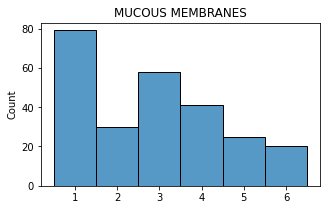

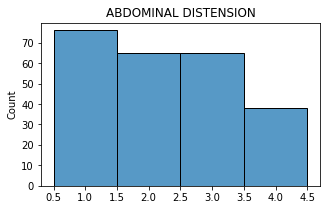

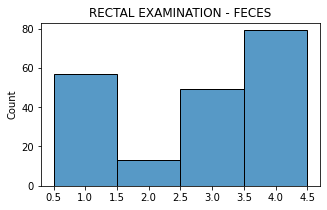

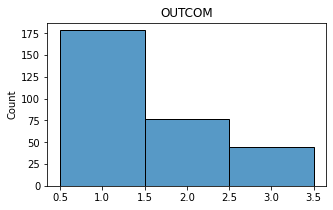

In [8]:
#визуализация дискретных (категориальных) параметров
for col in [item for item in horse.select_dtypes(['category']).columns]:
    plt.figure(figsize=(5,3))
    ax = sns.histplot(data=horse[col].cat.as_ordered())
    ax.set(xlabel = None, title = col.upper())
plt.show()

In [267]:
"""
Выводы по характеристикам:
1. rectal temperature - значения сконцентрированы вокруг среднего, размах не велик, 20% пустых
2. pulse - значения сконцентрированы вокруг среднего, размах большой, 8% пустых
3. packed cell volume - значения сконцентрированы вокруг среднего, размах большой, 9,7% пустых
4. total protein - значения сильно смещены влево (к диапазону нормальных значений), размах большой, 11% пустых

5. mucous membranes - 15,6% пустых, превалирует категория "1"
6. abdominal distension - 18,6% пустых, распределение близко к равномерному
7. rectal examination - feces - 34% пустых, превалируют категории "1" и "4"
8. outcom - 0.33% пустых, превалируют категории "1"
"""

'\nВыводы по характеристикам:\n1. rectal temperature - значения сконцентрированы вокруг среднего, размах не велик, 20% пустых\n2. pulse - значения сконцентрированы вокруг среднего, размах большой, 8% пустых\n3. packed cell volume - значения сконцентрированы вокруг среднего, размах большой, 9,7% пустых\n4. total protein - значения сильно смещены влево (к диапазону нормальных значений), размах большой, 11% пустых\n\n5. mucous membranes - 15,6% пустых, превалирует категория "1"\n6. abdominal distension - 18,6% пустых, распределение близко к равномерному\n7. rectal examination - feces - 34% пустых, превалируют категории "1" и "4"\n8. outcom - 0.33% пустых, превалируют категории "1"\n'

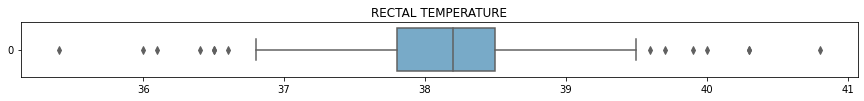

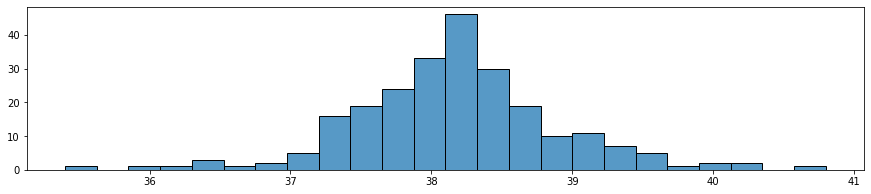

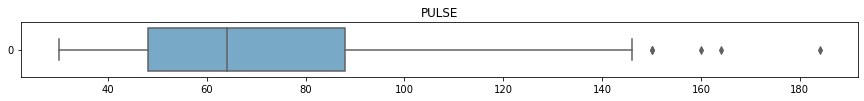

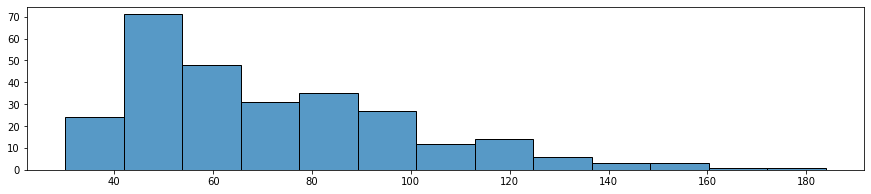

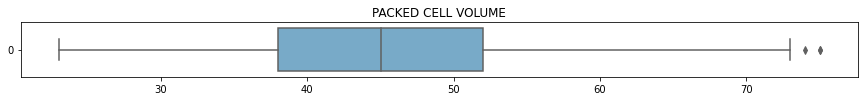

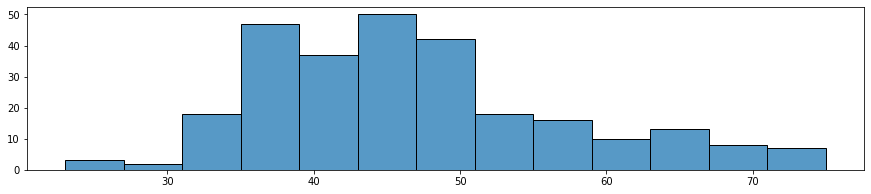

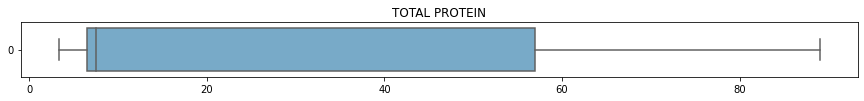

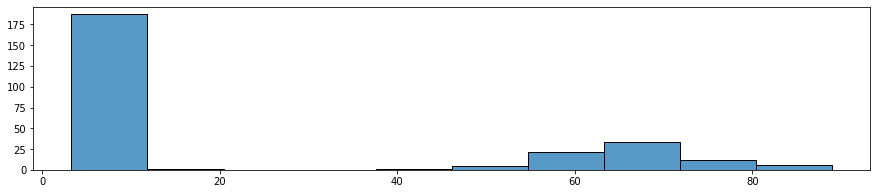

In [268]:
#Задание №2

#визуализация непрерывных параметров
for col in [item for item in horse.select_dtypes(['float64']).columns]:
    plt.figure(figsize=(15,1))
    ax = sns.boxplot(data=horse[col], orient="h", palette="Blues")
    ax.set_title(col.upper())
    plt.figure(figsize=(15,3))
    ax1 = sns.histplot(data=horse[col], palette="Blues")
    ax1.set(xlabel = None, ylabel = None)
    
plt.show()

In [269]:
#количество и доля выбросов
print('Количество выбросов непрерывных переменных:')
for col in [item for item in horse.select_dtypes(['float64']).columns]:
    q1 = horse[col].quantile(0.25)
    q3 = horse[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr) 
    upper_bound = q3 + (1.5 * iqr)
    remove_outliers = horse[horse[col].between(lower_bound, upper_bound, inclusive=True)]
    out_num = len(horse[horse[col].isna() == False]) - len(remove_outliers)
    out_num_percent = round((out_num * 100) / len(horse[horse[col].isna() == False]), 2)
    print(f'{col}:  {out_num}({out_num_percent}%)')

Количество выбросов непрерывных переменных:
rectal temperature:  14(5.83%)
pulse:  5(1.81%)
packed cell volume:  3(1.11%)
total protein:  0(0.0%)


In [270]:
"""
Выводы по выбросам:
1. rectal temperature - количество выбросов не велико, обусловлены естественными причинами (согласно описания),
оставить, как есть
2. pulse - количество выбросов не велико, экстремальные значения параметра, обусловлены состоянием здоровья лошади 
(вывод сделан на основании данных о смерности лошадей ('outcom') с 'pulse' > 140), оставить, как есть
3. packed cell volume - количество выбросов не велико, экстремальные значения параметра, обусловлены состоянием 
здоровья лошади (вывод сделан на основании данных о смерности лошадей ('outcom') с 'acked cell volume' > 60), 
оставить, как есть
4. total protein - выбросов нет
"""

"\nВыводы по выбросам:\n1. rectal temperature - количество выбросов не велико, обусловлены естественными причинами (согласно описания),\nоставить, как есть\n2. pulse - количество выбросов не велико, экстремальные значения параметра, обусловлены состоянием здоровья лошади \n(вывод сделан на основании данных о смерности лошадей ('outcom') с 'pulse' > 140), оставить, как есть\n3. packed cell volume - количество выбросов не велико, экстремальные значения параметра, обусловлены состоянием \nздоровья лошади (вывод сделан на основании данных о смерности лошадей ('outcom') с 'acked cell volume' > 60), \nоставить, как есть\n4. total protein - выбросов нет\n"

In [271]:
horse[horse['pulse'] > 140]

,rectal temperature,pulse,mucous membranes,abdominal distension,rectal examination - feces,packed cell volume,total protein,outcom
3,39.1,164.0,6.0,4.0,3.0,48.0,7.2,2.0
39,39.2,146.0,NaN,NaN,NaN,NaN,NaN,2.0
41,39.0,150.0,NaN,NaN,NaN,47.0,8.5,1.0
55,38.6,160.0,5.0,4.0,4.0,38.0,NaN,2.0
255,38.8,184.0,1.0,3.0,2.0,33.0,3.3,2.0
275,38.8,150.0,6.0,2.0,NaN,50.0,6.2,2.0


In [272]:
horse[horse['packed cell volume'] > 60]

,rectal temperature,pulse,mucous membranes,abdominal distension,rectal examination - feces,packed cell volume,total protein,outcom
4,37.3,104.0,6.0,NaN,NaN,74.0,7.4,2.0
30,37.7,96.0,4.0,4.0,4.0,66.0,7.5,2.0
35,NaN,104.0,3.0,3.0,NaN,73.0,8.4,3.0
40,NaN,88.0,6.0,3.0,4.0,63.0,6.5,2.0
46,37.9,60.0,4.0,4.0,4.0,65.0,7.5,1.0
49,37.2,84.0,5.0,2.0,2.0,73.0,5.5,2.0
62,37.8,88.0,2.0,NaN,4.0,64.0,8.0,2.0
63,38.2,130.0,4.0,4.0,NaN,65.0,82.0,3.0
79,37.5,96.0,6.0,2.0,NaN,69.0,8.9,1.0
83,38.0,NaN,6.0,4.0,NaN,68.0,7.8,2.0


In [273]:
#Задание №3

#считаю пропуски
missed_count = {}
for item in horse.isna().sum().index:
    missed_count[item] = [horse.isna().sum()[item], (horse.isna().mean()[item]).round(2)]

missed_count

{'rectal temperature': [60, 0.2],
 'pulse': [24, 0.08],
 'mucous membranes': [47, 0.16],
 'abdominal distension': [56, 0.19],
 'rectal examination - feces': [102, 0.34],
 'packed cell volume': [29, 0.1],
 'total protein': [33, 0.11],
 'outcom': [1, 0.0]}

In [274]:
"""
1. rectal temperature - заполнить средним (нормальное распределение, концентрация вокруг среднего)
2. pulse - получить средние по двум группам значений переменной (высокие/низкие), по признаку смерти у строки 
со значением 'pulse'= Null заполнить средним ('outcom' 1/2-3 = среднее из низкий/высокий)
3. mucous membranes - если лошадь жива заполняем 1-3, если нет 4-6, если неизвестно - 1 (среди живых 3/4 с 1-3, 
среди мертвых 2/3 с 4-6)
4. abdominal distension - если лошадь жива заполняем 1-2, если нет 3-4, если неизвестно - модой
(среди живых 3/4 с 1-2, среди мертвых 2/3 с 3-4)
5. rectal examination - feces - заполняем модой
6. packed cell volume - заполнить средним (распределение близкое к нормальному, концентрация вокруг среднего)
7. total protein - заполняем средним (корреляции нет ни с чем)
"""

"\n1. rectal temperature - заполнить средним (нормальное распределение, концентрация вокруг среднего)\n2. pulse - получить средние по двум группам значений переменной (высокие/низкие), по признаку смерти у строки \nсо значением 'pulse'= Null заполнить средним ('outcom' 1/2-3 = среднее из низкий/высокий)\n3. mucous membranes - если лошадь жива заполняем 1-3, если нет 4-6, если неизвестно - 1 (среди живых 3/4 с 1-3, \nсреди мертвых 2/3 с 4-6)\n4. abdominal distension - если лошадь жива заполняем 1-2, если нет 3-4, если неизвестно - модой\n(среди живых 3/4 с 1-2, среди мертвых 2/3 с 3-4)\n5. rectal examination - feces - заполняем модой\n6. packed cell volume - заполнить средним (распределение близкое к нормальному, концентрация вокруг среднего)\n7. total protein - заполняем средним (корреляции нет ни с чем)\n"

In [275]:
#формирую целевой датафрейм

#'rectal temperature'
horse['rectal temperature'].fillna(horse['rectal temperature'].mean(), inplace = True)

#'pulse'
def pulse_conversion(row):
    if pd.isna(row['pulse']):
        if row['outcom'] == 1.0:
            return horse[horse['pulse'] < 100]['pulse'].mean()
        elif row['outcom'] in [2.0, 3.0]:
            return horse[horse['pulse'] >= 100]['pulse'].mean()
        else:
            return horse['pulse'].mean()
    else:
        return row['pulse']

horse['pulse'] = horse.apply(pulse_conversion, axis=1)

#'mucous membranes'
def m_membranes_conversion(row):
    if pd.isna(row['mucous membranes']):
        if row['outcom'] == 1.0:
            return rnd.randint(1, 3)
        elif row['outcom'] in [2.0, 3.0]:
            return rnd.randint(4, 6)
        else:
            return 1.0
    else:
        return row['mucous membranes']

horse['mucous membranes'] = horse.apply(m_membranes_conversion, axis=1)
horse['mucous membranes'] = horse['mucous membranes'].astype('category')

#'abdominal distension'
def abd_dist_conversion(row, mode):
    if pd.isna(row['abdominal distension']):
        if row['outcom'] == 1.0:
            return rnd.randint(1, 2)
        elif row['outcom'] in [2.0, 3.0]:
            return rnd.randint(3, 4)
        else:
            return mode
    else:
        return row['abdominal distension']

mode = horse['abdominal distension'].mode()
horse['abdominal distension'] = horse.apply(lambda row: abd_dist_conversion(row, mode), axis=1)
horse['abdominal distension'] = horse['abdominal distension'].astype('category')

#'rectal examination - feces'
horse['rectal examination - feces'].fillna(horse['rectal examination - feces'].mode()[0], inplace = True)

#'packed cell volume'
horse['packed cell volume'].fillna(horse['packed cell volume'].mean(), inplace = True)

#'total protein'
horse['total protein'].fillna(horse['total protein'].mean(), inplace = True)

#'outcom', одно пустое значение, корреляция не ясна
horse['outcom'].fillna(horse['outcom'].mode()[0], inplace = True)

In [276]:
horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   rectal temperature          300 non-null    float64 
 1   pulse                       300 non-null    float64 
 2   mucous membranes            300 non-null    category
 3   abdominal distension        300 non-null    category
 4   rectal examination - feces  300 non-null    category
 5   packed cell volume          300 non-null    float64 
 6   total protein               300 non-null    float64 
 7   outcom                      300 non-null    category
dtypes: category(4), float64(4)
memory usage: 11.4 KB


In [277]:
horse.head()

,rectal temperature,pulse,mucous membranes,abdominal distension,rectal examination - feces,packed cell volume,total protein,outcom
0,38.5,66.0,5.0,4.0,3.0,45.0,8.4,2.0
1,39.2,88.0,4.0,2.0,4.0,50.0,85.0,3.0
2,38.3,40.0,3.0,1.0,1.0,33.0,6.7,1.0
3,39.1,164.0,6.0,4.0,3.0,48.0,7.2,2.0
4,37.3,104.0,6.0,4.0,4.0,74.0,7.4,2.0
